# BoomBikes Assignment

## Problem Statement 
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


### Business Goal 
Create a model to determined the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 

In [414]:
# Import the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# Import Datetime function
import datetime as dt


# Import python libraries for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler
from sklearn.metrics import r2_score

## Step 1: Read/Understand and manipulate data

In [333]:
# Import the dataset and look into the first 5 rows.
bikedata = pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Check the various aspects of the dataset

In [334]:
bikedata.shape

(730, 16)

In [335]:
# List the columnns and determine if there are any null values on columns
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no columns with null values. Hence no missing data

In [336]:
# Check the numerical variables and its distribution
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Manipulation - Fixing/removing columns

In [337]:
# Column 'instant' is of no significance as index is already available. So we can drop it for now.
# Column 'dteday' can be dropped as there are other columns that will explain the year and month. Splitting day alone is not required. 
# Columns 'casual and registered' are simply combined as the target variable 'cnt'. As we have the target variable, lets drop these
bikedata.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### Convert feature values to categorical data  - Data preparation 

In [338]:
# 'weathersit' has numerical values - We can convert to string to make it more understandable to business 
bikedata['weathersit'] = bikedata['weathersit'].map({1:'Clear',2:'Misty',3:'Snow',4:'Heavy rain'})

In [339]:
# Season - Convert seasons as string for better view
bikedata['season'] = bikedata['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [340]:
# weekday is the day of the week - Converting to string will help to visualize better
bikedata['weekday'] = bikedata['weekday'].map({6:'Monday', 0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday'})

In [341]:
# Month - Convert it to a categorical variable
bikedata['mnth'] = bikedata['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [342]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [343]:
bikedata.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [344]:
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


##### Outlier removal

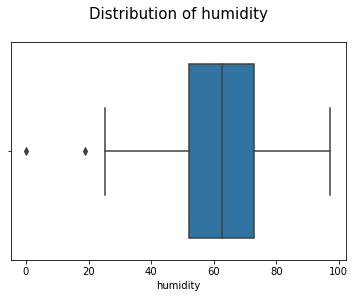

In [345]:
# Box plots on the variables humidity, windspeed to look for outliers
plt.title('Distribution of humidity\n',fontsize=15)
sns.boxplot(bikedata.hum)
plt.xlabel('humidity',fontsize=10)
plt.show()

### Insights 
* There are not many outliers in the humidity. Only 2 data points that has a value less than 20(Lower whisker). 

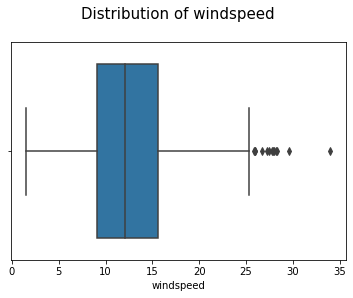

In [346]:
# Box plots on the variables windspeed to look for outliers
plt.title('Distribution of windspeed\n',fontsize=15)
sns.boxplot(bikedata.windspeed)
plt.xlabel('windspeed',fontsize=10)
plt.show()

In [347]:
print ((bikedata.windspeed > 25).sum())

17


### Insights 
* 17 data points that has a value over the whisker. 

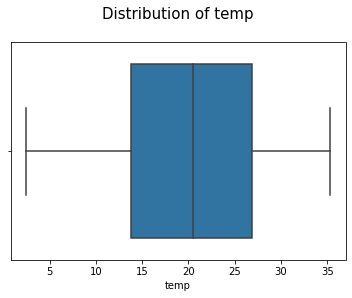

In [348]:
# Box plots on the variables temp to look for outliers
plt.title('Distribution of temp\n',fontsize=15)
sns.boxplot(bikedata.temp)
plt.xlabel('temp',fontsize=10)
plt.show()

### Insights 
* No data points that has a value over the whisker. 

## Step 2 : Data Visualisation 

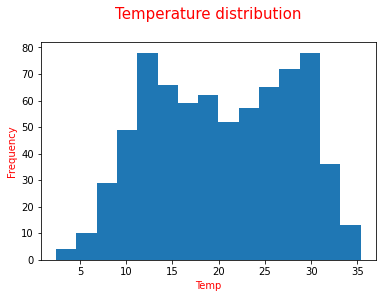

In [349]:
# How the temperature is distributed
plt.title('Temperature distribution\n',fontsize=15,color='r')
plt.hist(bikedata.temp,bins=15)
plt.xlabel('Temp',color='r')
plt.ylabel('Frequency',color='r')
plt.show()

### Insights 
* Temperature mostly lies between 10 and 32

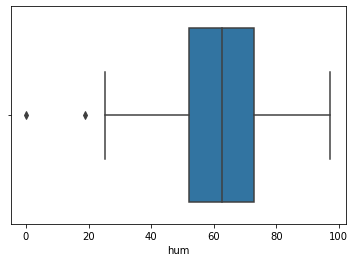

In [350]:
# Box plots on the variables humidity, windspeed to look for outliers
sns.boxplot(bikedata.hum)
plt.show()

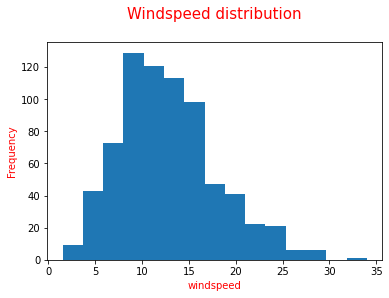

In [351]:
# How the windspeed is distributed
plt.title('Windspeed distribution\n',fontsize=15,color='r')
plt.hist(bikedata.windspeed,bins=15)
plt.xlabel('windspeed',color='r')
plt.ylabel('Frequency',color='r')
plt.show()

### Insights 
* Windspeed mostly lies between 5 and 20

##### Segmented univariate 

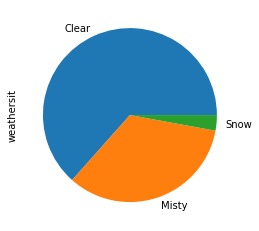

In [352]:
# Have a view how the weather situation is around. 
bikedata.weathersit.value_counts().plot.pie()
plt.show()

### Insights 
* Mostly of the year the weather is clear

##### Bivariate Analysis

Let's check how the target variable is correlated or distributed based on the other variables

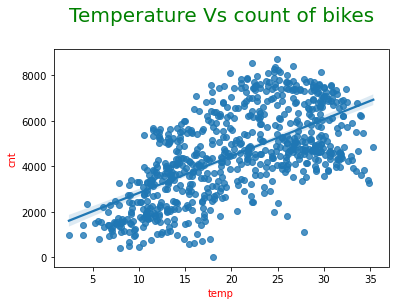

In [353]:
# Plot temp against the target variable count
plt.title('Temperature Vs count of bikes\n',fontsize=20,color='g')
sns.regplot(x='temp',y='cnt',data=bikedata)
plt.xlabel('temp',fontsize=10,color='r')
plt.ylabel('cnt',fontsize=10,color='r')
plt.show()

### Insights 
* We can see a nice straight line which indicates a linear relation. 

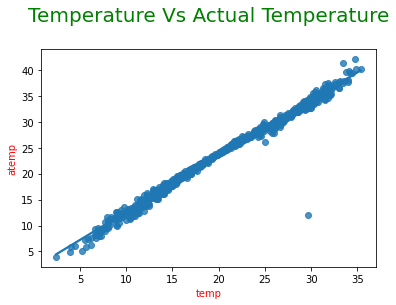

                  yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000  0.008195   -0.002945  0.048789  0.047215 -0.112547   
holiday     0.008195  1.000000   -0.252948 -0.028764 -0.032703 -0.015662   
workingday -0.002945 -0.252948    1.000000  0.053470  0.052940  0.023202   
temp        0.048789 -0.028764    0.053470  1.000000  0.991696  0.128565   
atemp       0.047215 -0.032703    0.052940  0.991696  1.000000  0.141512   
hum        -0.112547 -0.015662    0.023202  0.128565  0.141512  1.000000   
windspeed  -0.011624  0.006257   -0.018666 -0.158186 -0.183876 -0.248506   
cnt         0.569728 -0.068764    0.062542  0.627044  0.630685 -0.098543   

            windspeed       cnt  
yr          -0.011624  0.569728  
holiday      0.006257 -0.068764  
workingday  -0.018666  0.062542  
temp        -0.158186  0.627044  
atemp       -0.183876  0.630685  
hum         -0.248506 -0.098543  
windspeed    1.000000 -0.235132  
cnt         -0.235132  1.000000  


In [354]:
# There are two variables temp and atemp in the dataset. Actual temperature and how it feels.
# Let's check the correlation between those two.
plt.title('Temperature Vs Actual Temperature\n',fontsize=20,color='g')
sns.regplot(x='temp',y='atemp',data=bikedata)
plt.xlabel('temp',fontsize=10,color='r')
plt.ylabel('atemp',fontsize=10,color='r')
plt.show()
print (bikedata.corr())

### Insights 
* We can see that all datapoints are distributed around the linear line and the correlation is 0.99. So one of the columns can be dropped to avoid multicollinearity

In [355]:
# Dropping the column temp.
bikedata.drop('temp',axis=1,inplace=True)

#### Pairplot to look at all numerical variable is correlated

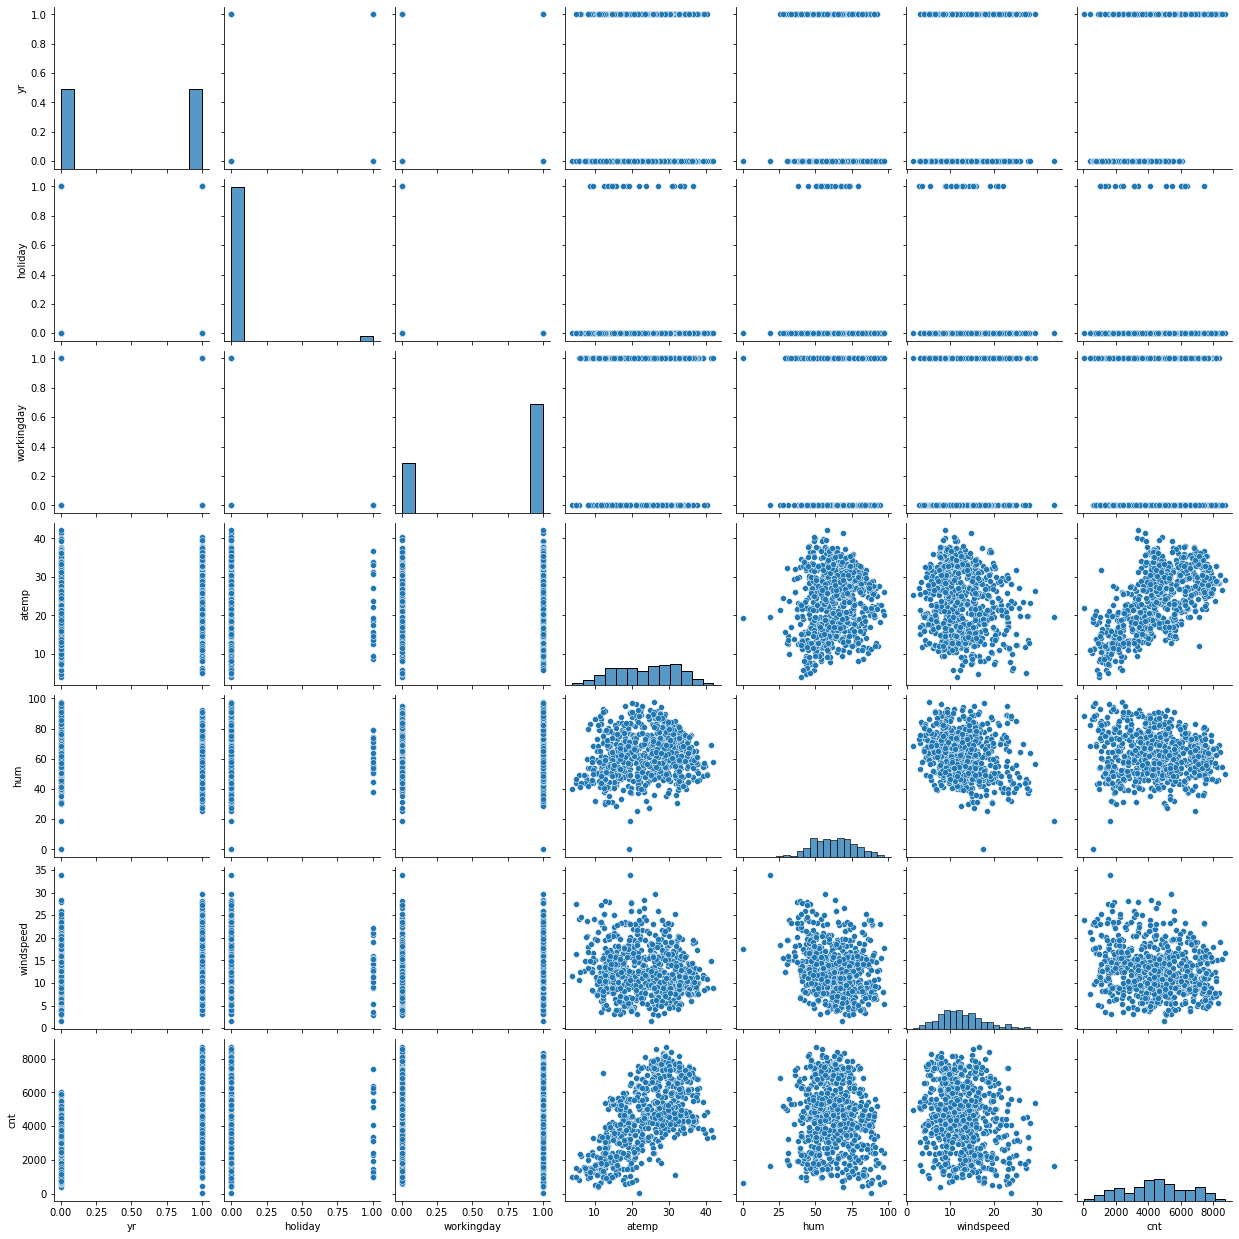

In [356]:
# Visualize the numeric variables using pairplots.
sns.pairplot(bikedata)
plt.show()

### Insights 
* We can see some relation between atemp, windspeed, humidity and the target variable. Let's check on the categorical variables further

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

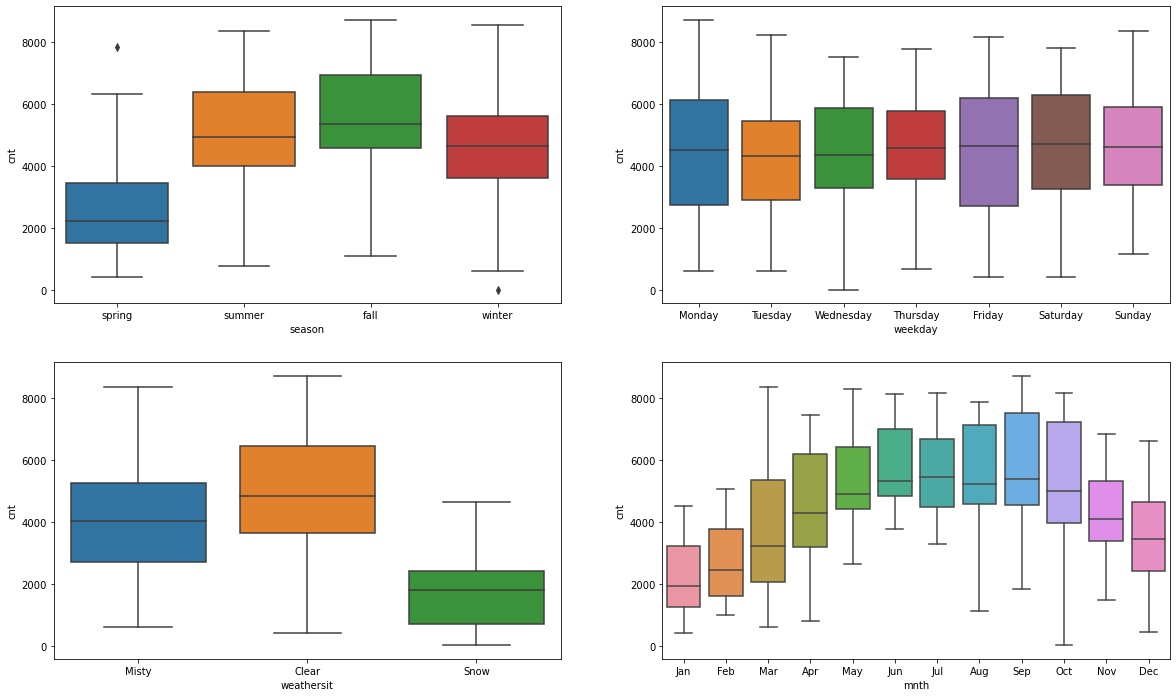

In [357]:
# Visualize categorical variables.
plt.figure(figsize=[20,12])
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata)
plt.subplot(2,2,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata)
plt.subplot(2,2,4)
sns.boxplot(x='mnth', y = 'cnt',data=bikedata)

### Insights
* The count of bikes is high when weather is misty or clear
* The count is almost the similar during Friday and Monday
* Demand is higher during Summer, Fall seasons than winter, spring
* Comparatively the number of bikes rented is low in January and at the highest during September, october

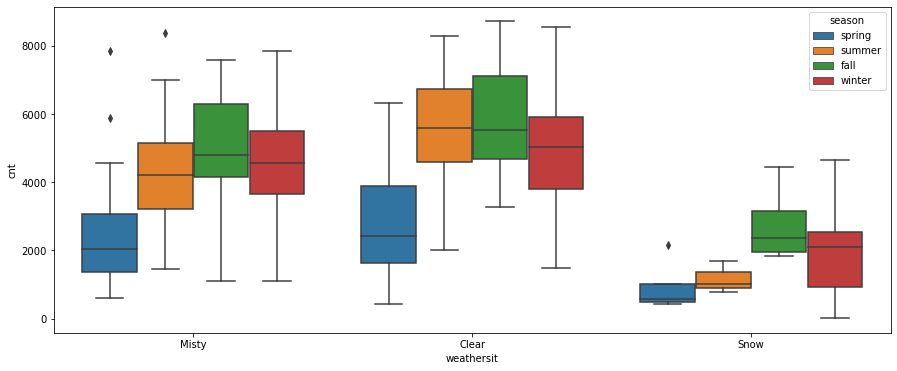

In [358]:
# Visualize categorical variables in parallel.
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'season', data = bikedata)
plt.show()

### Insights
* As expected count of bikes hired is low during snow 

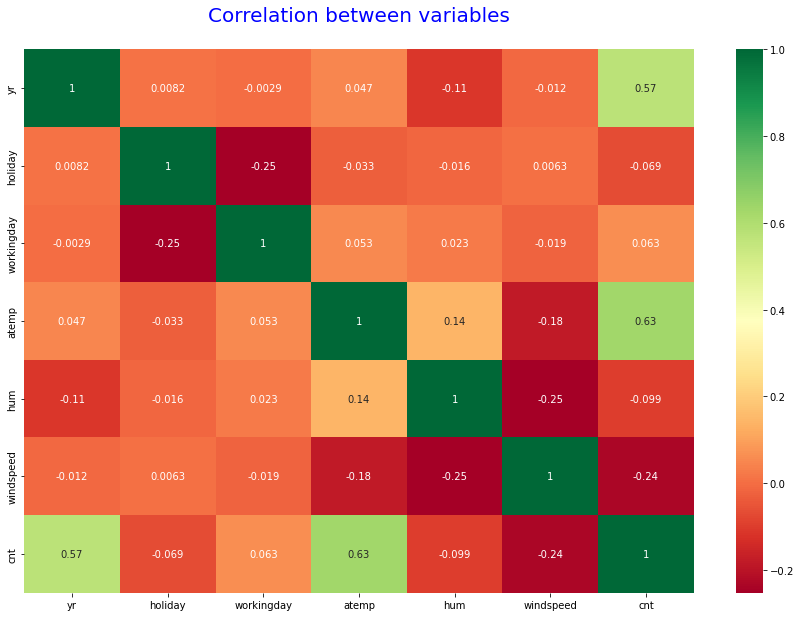

In [359]:
plt.figure(figsize=[15,10])
plt.title('Correlation between variables\n',fontsize=20,c='b')
sns.heatmap(bikedata.corr(),cmap='RdYlGn',annot=True)
plt.show()

### Insights
* Correlation exists between bike rental count and year, temperature 
* Highly -ve correlation is with windspeed

##### Now that we have visualized data and understood how it looks, let's move on to the next step - Data Preparation

## Step 3 : Data preparation 

#### Creating dummy variables

In [360]:
# Let's take a look at the dataframe once 
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,0,Misty,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,0,Misty,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600


In [361]:
# Variable season has 4 levels. Let's convert these in to integer
seasons = pd.get_dummies(bikedata.season)
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Of the 4 levels, are represented as below -
* 000 - Fall
* 010 - Summer
* 100 - Spring
* 001 - Winter

In [362]:
# Dropping one column to avoid multicollinearity
seasons = pd.get_dummies(bikedata.season,drop_first=True)

# Merge to bikedata set
bikedata = pd.concat([bikedata, seasons], axis=1)
bikedata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Monday,0,Misty,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tuesday,0,Misty,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wednesday,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [363]:
# Variable mnth is categorical and let's convert it as well - Drop first column to avoid multicollinearity
month = pd.get_dummies(bikedata.mnth,drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [364]:
# Concantenate the encoded months dataframe to bike data 
bikedata = pd.concat([bikedata,month],axis=1)

In [365]:
# Variable weathersit has 3 levels and let's convert these to integer 
wsit = pd.get_dummies(bikedata.weathersit)
wsit.head()

,Clear,Misty,Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Of the 4 levels, dataframe has 3 data values.
* 10 - Clear
* 01 - Misty
* 00 - Snow

In [366]:
# # Dropping one column to avoid multicollinearity and Concatenate bikedata and weather dataframe into one
wsit = pd.get_dummies(bikedata.weathersit,drop_first=True)
bikedata = pd.concat([bikedata,wsit],axis=1)

In [367]:
# Weekday column has 7 levels. Let's convert this to integer
wkday = pd.get_dummies(bikedata.weekday)
wkday.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [368]:
# Drop first column from the encoded weekday and concantenate to the bikedata
wkday = pd.get_dummies(bikedata.weekday,drop_first=True)
bikedata = pd.concat([bikedata,wkday],axis=1)

In [369]:
# Remove/drop the original columns for which we created dummy variables.
bikedata = bikedata.drop(['mnth','weathersit','season','weekday'],axis=1)
bikedata.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Misty,Snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Splitting datasets into Train and test sets

In [370]:
# Split the dataframe in to train and test (70:30 and use the same set each time)
np.random.seed(0)
df_train, df_test = train_test_split(bikedata, train_size=0.7, test_size=0.3, random_state=100)

In [371]:
# Check the factors of the train and test datasets 
print (df_train.shape)
print (df_test.shape)

(510, 29)
(219, 29)


#### Rescaling features

In [372]:
# Variables temp, atemp, hum, windspeed and cnt all can be scaled same.
scaler = MinMaxScaler()

num_vars = ['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Misty,Snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,1,0,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,1,0,0,0,0,0


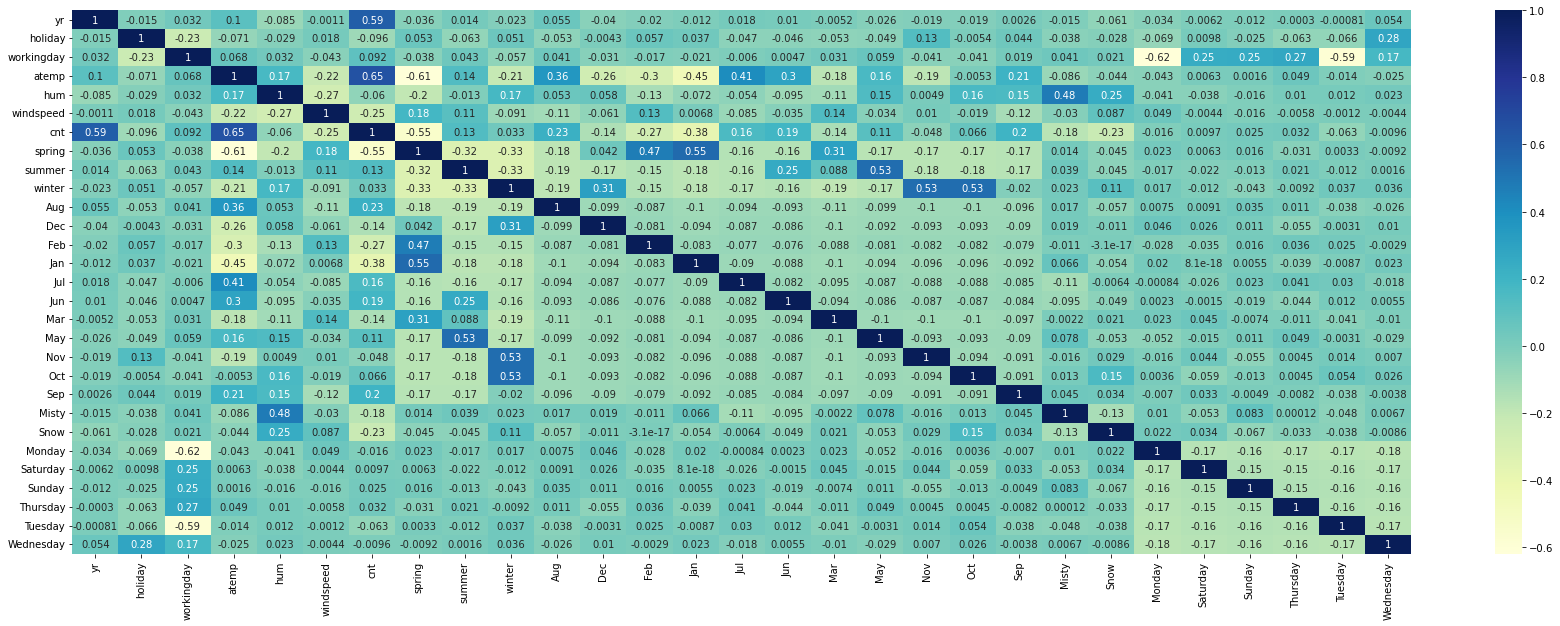

In [373]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30,10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights
* year, atemp, fall, summer, months (Jun, jul, aug, sep, october) are correlated with count of bike rentals

### Divide X and Y datasets for model building

In [374]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building the model

#### Linear regression from sklearn and using RFE

In [375]:
# Import required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [376]:
X_train.shape

(510, 28)

In [377]:
# Create an instance of the linear regression model
lm = LinearRegression()

# Fit the X_train and y_train into the instance
lm.fit(X_train,y_train)

# RFE - using Top 15 variables
rfe = RFE(lm,step=15)
rfe = rfe.fit(X_train,y_train)

In [378]:
# List the variables chosen and ranking of them
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', False, 2),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Misty', True, 1),
 ('Snow', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', True, 1),
 ('Wednesday', False, 2)]

In [379]:
# Columns that are supported by RFE 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'winter',
       'Dec', 'Jan', 'Sep', 'Misty', 'Snow', 'Monday', 'Tuesday'],
      dtype='object')

In [380]:
# Columns that are not support by RFE
X_train.columns[~rfe.support_]

Index(['spring', 'summer', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Saturday', 'Sunday', 'Thursday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel for detailed statistics

In [381]:
# Create X_train with RFE selected variables
X_train_rfe = X_train[col]

In [382]:
import statsmodels.api as sm
X_train_rfe_lm = sm.add_constant(X_train_rfe)

In [383]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe_lm).fit()

In [384]:
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.73e-177
Time:                        21:16:49   Log-Likelihood:                 481.35
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     496   BIC:                            -875.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      0.025      7.688      0.0

In [385]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [386]:
# Drop the constant before deriving VIF
X_train_rfe_lm = X_train_rfe_lm.drop(['const'], axis=1)

# Check VIF for the selected columns to determine insignificant variable and that has high collinearity
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_lm.values,i) for i in range(X_train_rfe_lm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,34.53
12,Monday,8.55
13,Tuesday,8.28
1,holiday,2.25
4,hum,1.90
3,atemp,1.88
10,Misty,1.57
8,Jan,1.50
6,winter,1.31
11,Snow,1.26


##### The column 'holiday' has a higher p value and relatively higher VIF. Let's drop that first

In [387]:
X_train_1 = X_train_rfe.drop(['holiday'],axis=1)

In [388]:
# See the first 5 columns of the resultant data frame
X_train_1.head()

,yr,workingday,atemp,hum,windspeed,winter,Dec,Jan,Sep,Misty,Snow,Monday,Tuesday
653,1,1,0.501133,0.575354,0.300794,1,0,0,0,0,0,0,0
576,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0,0,0,0,1,0,1,0
728,1,0,0.200348,0.498067,0.663106,0,1,0,0,0,0,0,1
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,1,0,1,0


In [389]:
# Add a constant 
X_train_1_lm = sm.add_constant(X_train_1)

In [390]:
# Fit the model and print the summary
lm = sm.OLS(y_train,X_train_1_lm).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.5
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.73e-177
Time:                        21:16:49   Log-Likelihood:                 481.35
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     496   BIC:                            -875.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1648      0.040      4.154      0.0

In [391]:
# Drop the const column before calculating VIF's
X_train_1_lm = X_train_1_lm.drop(['const'], axis=1)

# Checking VIF to further determine any other relation between variables and find the most insignificant variable.

vif1 = pd.DataFrame()
X = X_train_1_lm
vif1['Features'] = X.columns
vif1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
3,hum,27.69
1,workingday,16.20
2,atemp,12.10
11,Monday,4.41
4,windspeed,4.31
12,Tuesday,4.28
9,Misty,2.23
0,yr,2.06
5,winter,1.72
7,Jan,1.54


##### 'Tuesday' column has high p-value and relatively low VIF that 'hum' column.  Let's try dropping 'Tuesday'

In [392]:
X_train_2 = X_train_1.drop(['Tuesday'],axis=1)

In [393]:
# Add constant
X_train_2_lm = sm.add_constant(X_train_2)

In [394]:
# Fit the model
lm = sm.OLS(y_train,X_train_2_lm).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.03e-177
Time:                        21:16:49   Log-Likelihood:                 479.15
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     497   BIC:                            -877.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2142      0.032      6.723      0.0

In [395]:
# Drop constant before calculating VIF
X_train_2_lm = X_train_2_lm.drop(['const'],axis=1)

# There are errors showing multicollinearity - Checking VIF
vif = pd.DataFrame()
X = X_train_2_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,20.40
2,atemp,11.38
1,workingday,4.60
4,windspeed,3.68
9,Misty,2.16
0,yr,2.04
11,Monday,1.82
5,winter,1.72
7,Jan,1.50
6,Dec,1.33


##### Dec column has higher P-value as compared to other - Let's try to remove that as well

In [396]:
X_train_3 = X_train_2.drop(['Dec'],axis=1)

In [397]:
# Add constant
X_train_3_lm = sm.add_constant(X_train_3)

In [398]:
# Fit the model
lm = sm.OLS(y_train,X_train_3_lm).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.4
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.55e-177
Time:                        21:16:49   Log-Likelihood:                 475.95
No. Observations:                 510   AIC:                            -927.9
Df Residuals:                     498   BIC:                            -877.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2046      0.032      6.435      0.0

In [399]:
# Dropping constant before calculating VIF
X_train_3_lm = X_train_3_lm.drop(['const'],axis=1)

# There are errors showing multicollinearity - Checking VIF
vif1 = pd.DataFrame()
X = X_train_3_lm
vif1['Features'] = X.columns
vif1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
3,hum,19.19
2,atemp,10.55
1,workingday,4.57
4,windspeed,3.68
8,Misty,2.13
0,yr,2.04
10,Monday,1.80
5,winter,1.65
6,Jan,1.46
9,Snow,1.18


##### 'hum' has p-value as 0.001 and negative co-efficient and comparatively high p - value that other columns. Let's try to build another model by dropping it

In [400]:
X_train_4 = X_train_3.drop(['hum'],axis=1)

In [401]:
# Add constant
X_train_4_lm = sm.add_constant(X_train_4)

In [402]:
# Fit the model
lm = sm.OLS(y_train,X_train_4_lm).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.43e-176
Time:                        21:16:49   Log-Likelihood:                 469.97
No. Observations:                 510   AIC:                            -917.9
Df Residuals:                     499   BIC:                            -871.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.022      5.628      0.0

In [403]:
# Calculate VIF
vif1 = pd.DataFrame()
X = X_train_4_lm.drop(['const'],axis=1)
vif1['Features'] = X.columns
vif1['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif1['VIF'] = round(vif1['VIF'],2)
vif1 = vif1.sort_values(by='VIF',ascending=False)
vif1

,Features,VIF
2,atemp,4.98
1,workingday,4.27
3,windspeed,3.41
0,yr,2.04
9,Monday,1.75
7,Misty,1.54
4,winter,1.31
5,Jan,1.23
6,Sep,1.15
8,Snow,1.08


The p-values and VIF are considerably good and R2 is 81.6 and adjusted R2 is 81.2 which is better. 

In [404]:
X_train_4_lm.shape

(510, 11)

### Residual Analysis on the data

In [405]:
# Predict y_train 
y_train_cnt = lm.predict(X_train_4_lm)

<function matplotlib.pyplot.show(close=None, block=None)>

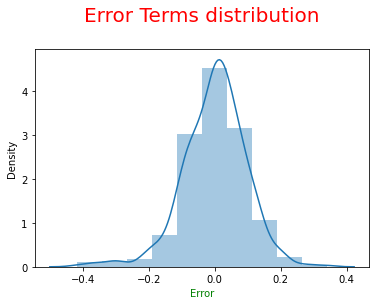

In [406]:
# Plot a histogram to see the distribution of errors
sns.distplot((y_train - y_train_cnt),bins=10)
plt.title('Error Terms distribution\n',fontsize=20,color='r')
plt.xlabel('Error',fontsize=10,color='g')
plt.show

### Assumptions
* The error distribution is a normal distribution with mean as zeros, which is the main assumtption

### Final Step - Making Predictions

##### We apply the same steps from scaling to test datasets.

In [407]:
# Scale test datasets
num_vars = ['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Misty,Snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,1,0,0,1,0,0,0,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [408]:
# Divide Test is X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [409]:
# Drop the constant column from X_train_4 
a = X_train_4_lm.drop('const',axis=1)
a.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'winter', 'Jan', 'Sep',
       'Misty', 'Snow', 'Monday'],
      dtype='object')

In [410]:
# Create model - X_test_new dataframe with columns selected only
X_test_new = X_test[a.columns]

In [411]:
# Add a constant
X_test_new = sm.add_constant(X_test_new)

In [412]:
# Making Prediction
y_test_pred = lm.predict(X_test_new)

In [416]:
# Evaluate R2 score for the predicted model
print (r2_score(y_true = y_test, y_pred = y_test_pred))

0.770550731879688


### R2 Score is 77.06% which is decent as compared to the training dataset's adjusted R2 81.2% 

##### Difference between R2 in train and test models is 81.2 - 77.06 = 4.14 which is less than 5 %. Hence the model is good

## Model Evaluation

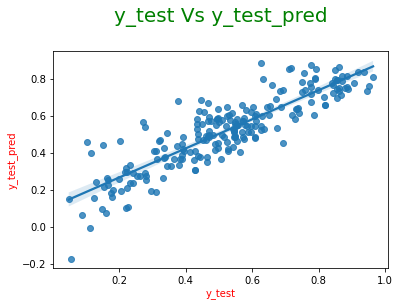

In [419]:
# Plotting against y_test and y_test_predict
sns.regplot(x=y_test,y=y_test_pred)
plt.title('y_test Vs y_test_pred\n',fontsize=20,color='g')
plt.xlabel('y_test',fontsize=10,color='r')
plt.ylabel('y_test_pred',fontsize=10,color='r')
plt.show()

###### A nice linear regression with data points around it 

Equation of the best fitted line is 
###### cnt = 0.2355 * yr + 0.0580 * workingday + 0.5402 * atemp - 0.1371 * windspeed + 0.0827 * winter - 0.0830 * Jan + 0.0730 * Sep - 0.0758 * Misty - 0.2857 * Snow + 0.0682 * Monday

Final inference/Business improvement:
1. Temperature has the highest co-efficient. So if it increases by 0.5402, count of bikes rented will increase as well. Business can concentrate on temperature
2. 2019 rentals has improved as compared to 2018. Year is the second influencing factor. 
3. Summer and Winter season has more rentals as compared to other seasons. Can focus more during these
4. Snow and Misty - have a negative co-efficient impacting the number of rentals. Business should think about how to improve during these times